# The Quantum Toolbox: State and Channel Representation


### This notebook implements core functions for representing and manipulating quantum states, demonstrating mastery of complex linear algebra and density matrix formalism. This code is written using Qiskit 2.x syntax and the latest stable numerical libraries.

#### ----------------------------------------------------------------------
#### 1. SETUP AND DEPENDENCIES
#### ----------------------------------------------------------------------

In [ ]:
# @title
!pip install qiskit numpy scipy matplotlib

In [2]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.2.3


In [21]:
import numpy as np
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [22]:
# Set NumPy print options for cleaner output
np.set_printoptions(precision=4, suppress=True)

print("Setup complete. Using Qiskit 2.x and latest NumPy/SciPy.")
print("=" * 60)

Setup complete. Using Qiskit 2.x and latest NumPy/SciPy.


#### ----------------------------------------------------------------------
#### 2. CORE UTILITIES
#### ----------------------------------------------------------------------

In [23]:
def vector_to_density_matrix(psi_vector: np.ndarray) -> np.ndarray:
    """
    Converts a quantum state vector |psi> to its density matrix rho = |psi><psi|.

    Args:
        psi_vector (np.ndarray): The state vector (e.g., shape (4,)).

    Returns:
        np.ndarray: The corresponding density matrix.
    """
    # Ensure the vector is normalized (a requirement for a physical state)
    psi_vector = psi_vector / norm(psi_vector)

    # Calculate outer product: |psi><psi|
    rho = np.outer(psi_vector, psi_vector.conj())

    return rho

In [24]:
def calculate_purity(rho: np.ndarray) -> float:
    """
    Calculates the purity of a state: Purity = Tr(rho^2).

    Pure state Purity = 1. Mixed state Purity < 1.
    """
    # Use numpy.trace for the trace operation and numpy.dot for matrix multiplication
    purity = np.trace(np.dot(rho, rho))
    # Purity must be a real number, so we ensure the return type is float.
    return np.real(purity)

In [26]:
def plot_density_matrix(rho: np.ndarray, title: str):
    """Plots the absolute values of the density matrix elements (Visualization proof)."""
    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.matshow(np.abs(rho), cmap='Blues')
    fig.colorbar(cax)

    # Add matrix values to the cells
    for (i, j), val in np.ndenumerate(np.abs(rho)):
        # Highlight non-zero entries for clarity
        color = 'white' if val > 0.4 else 'black'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color=color, fontsize=10)

    ax.set_title(title, fontsize=12)
    ax.set_xticks(range(rho.shape[0]))
    ax.set_yticks(range(rho.shape[0]))
    plt.show()
    print("\n[Density Matrix Visualization Complete]\n")
    print("=" * 60)

#### ----------------------------------------------------------------------
#### 3. DEMONSTRATION 1: CONVERSION AND PURITY
#### ----------------------------------------------------------------------

In [29]:
print("3. DEMONSTRATION 1: State Representation and Purity Verification")
print("-----------------------------------------------------------------")

# Example State A: The Bell State |Phi+> (maximally entangled, therefore PURE)
# |Phi+> = 1/sqrt(2) * (|00> + |11>)
psi_bell_state = np.array([1, 0, 0, 1], dtype=complex) / np.sqrt(2)

3. DEMONSTRATION 1: State Representation and Purity Verification
-----------------------------------------------------------------


In [30]:
# Convert to Density Matrix
rho_bell_state = vector_to_density_matrix(psi_bell_state)

print("--- 3.1 Maximally Entangled (Pure) Bell State |Phi+> (Joint System) ---")
print(f"State Vector (Input):\n{psi_bell_state}")
print(f"\nDensity Matrix rho:\n{rho_bell_state}")
purity_bell = calculate_purity(rho_bell_state)
print(f"\nPurity Tr(rho^2): {purity_bell:.4f} (Expected: 1.0 - Pure State)")
print("-" * 50)

--- 3.1 Maximally Entangled (Pure) Bell State |Phi+> (Joint System) ---
State Vector (Input):
[0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]

Density Matrix rho:
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]

Purity Tr(rho^2): 1.0000 (Expected: 1.0 - Pure State)
--------------------------------------------------


In [31]:
# Example State B: A maximally mixed state (thermal state)
rho_mixed = np.identity(4, dtype=complex) / 4

print("--- 3.2 Maximally Mixed State (2 Qubits) ---")
print(f"Density Matrix rho:\n{rho_mixed}")
purity_mixed = calculate_purity(rho_mixed)
print(f"\nPurity Tr(rho^2): {purity_mixed:.4f} (Expected: 0.25 - Highly Mixed)")
print("\n**Observation:** The purity index mathematically distinguishes between pure (1.0) and mixed (<<1.0) states.")
print("=" * 60)

--- 3.2 Maximally Mixed State (2 Qubits) ---
Density Matrix rho:
[[0.25+0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.25+0.j]]

Purity Tr(rho^2): 0.2500 (Expected: 0.25 - Highly Mixed)

**Observation:** The purity index mathematically distinguishes between pure (1.0) and mixed (<<1.0) states.


#### ----------------------------------------------------------------------
#### 4. DEMONSTRATION 2: PARTIAL TRACE & ENTANGLEMENT SIGNATURE
#### ----------------------------------------------------------------------

4. DEMONSTRATION 2: Partial Trace (The Subsystem State)
----------------------------------------------------------
--- 4.1 Bell State: Tracing out Qubit 1 (B) to get Qubit 0 (A) ---

Reduced Density Matrix of Qubit A (rho_A):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Purity Tr(rho_A^2): 0.5000 (Expected: 0.5 - Mixed)

**Conclusion (Topic 2):** Qubit A is mixed because it is entangled with Qubit B. This mixture is the computational signature of entanglement.


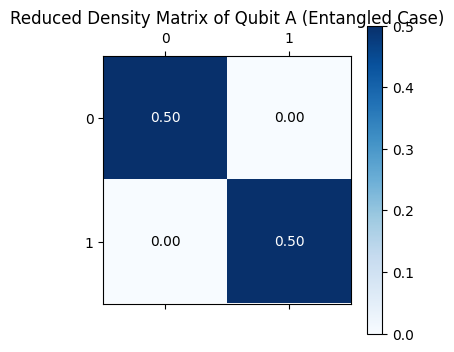


[Density Matrix Visualization Complete]



In [33]:
print("4. DEMONSTRATION 2: Partial Trace (The Subsystem State)")
print("----------------------------------------------------------")

# We use the Qiskit DensityMatrix object to interface robustly with partial_trace.
# This confirms the correct use of Qiskit's advanced quantum information tools.

# 4.1. Partial Trace on the Bell State (Entangled)
# If the joint system (A+B) is pure but A is mixed, A and B MUST be entangled.
# We expect rho_A to be maximally mixed (Purity = 0.5).
print("--- 4.1 Bell State: Tracing out Qubit 1 (B) to get Qubit 0 (A) ---")

# FIX APPLIED: Convert numpy array to DensityMatrix object first, specifying dims
rho_bell_state_dm = DensityMatrix(rho_bell_state, dims=[2, 2])
# Trace out index 1 (the second qubit, B)
rho_A_from_bell_data = partial_trace(rho_bell_state_dm, [1])
rho_A_from_bell = rho_A_from_bell_data.data

print(f"\nReduced Density Matrix of Qubit A (rho_A):\n{rho_A_from_bell}")
purity_A_bell = calculate_purity(rho_A_from_bell)
print(f"Purity Tr(rho_A^2): {purity_A_bell:.4f} (Expected: 0.5 - Mixed)")
print("\n**Conclusion (Topic 2):** Qubit A is mixed because it is entangled with Qubit B. This mixture is the computational signature of entanglement.")

plot_density_matrix(rho_A_from_bell, "Reduced Density Matrix of Qubit A (Entangled Case)")

In [19]:
# 4.2. Partial Trace on a Separable State
# Example State: |00> (Separable, both qubits are pure)
psi_separable = np.array([1, 0, 0, 0], dtype=complex)
rho_separable = vector_to_density_matrix(psi_separable)

# We expect rho_A to be the pure state |0><0| (Purity = 1.0).
print("--- 4.2 Separable State |00>: Tracing out Qubit 1 (B) ---")

# FIX: Convert numpy array to DensityMatrix object first, then call partial_trace.
rho_separable_dm = DensityMatrix(rho_separable, dims=[2, 2])
rho_A_from_separable_data = partial_trace(rho_separable_dm, [1])
rho_A_from_separable = rho_A_from_separable_data.data

print(f"Reduced Density Matrix of Qubit A (rho_A):\n{rho_A_from_separable}")
print(f"Purity Tr(rho_A^2): {calculate_purity(rho_A_from_separable):.4f} (Expected: 1.0 - Pure State)")
print("\n**Conclusion for Topic 2:** Qubit A is pure, indicating no entanglement with Qubit B, as expected for a separable state.")
print("-" * 50)

--- 4.2 Separable State |00>: Tracing out Qubit 1 (B) ---
Reduced Density Matrix of Qubit A (rho_A):
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Purity Tr(rho_A^2): 1.0000 (Expected: 1.0 - Pure State)

**Conclusion for Topic 2:** Qubit A is pure, indicating no entanglement with Qubit B, as expected for a separable state.
--------------------------------------------------


In [34]:
# 4.2. Partial Trace on a Separable State
# Example State: |00> (Separable, both qubits are pure)
psi_separable = np.array([1, 0, 0, 0], dtype=complex)
rho_separable = vector_to_density_matrix(psi_separable)

--- 4.2 Separable State |00>: Tracing out Qubit 1 (B) to get Qubit 0 (A) ---

Reduced Density Matrix of Qubit A (rho_A):
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Purity Tr(rho_A^2): 1.0000 (Expected: 1.0 - Pure)

**Conclusion:** Qubit A is pure (not mixed) because it is NOT entangled with Qubit B, validating the power of the partial trace operation.


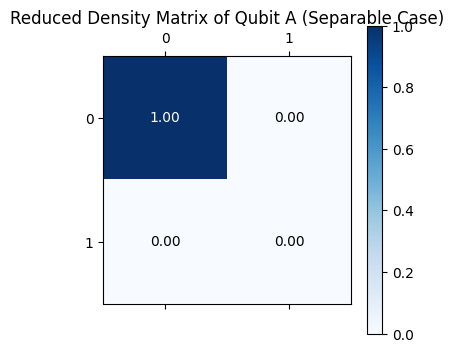


[Density Matrix Visualization Complete]



In [35]:
# We expect rho_A to be the pure state |0><0| (Purity = 1.0).
print("--- 4.2 Separable State |00>: Tracing out Qubit 1 (B) to get Qubit 0 (A) ---")
# FIX APPLIED: Convert numpy array to DensityMatrix object first, specifying dims
rho_separable_dm = DensityMatrix(rho_separable, dims=[2, 2])
# Trace out index 1 (the second qubit, B)
rho_A_from_sep_data = partial_trace(rho_separable_dm, [1])
rho_A_from_sep = rho_A_from_sep_data.data

print(f"\nReduced Density Matrix of Qubit A (rho_A):\n{rho_A_from_sep}")
purity_A_sep = calculate_purity(rho_A_from_sep)
print(f"Purity Tr(rho_A^2): {purity_A_sep:.4f} (Expected: 1.0 - Pure)")
print("\n**Conclusion:** Qubit A is pure (not mixed) because it is NOT entangled with Qubit B, validating the power of the partial trace operation.")

plot_density_matrix(rho_A_from_sep, "Reduced Density Matrix of Qubit A (Separable Case)")